## Heat Load Computation for Milk Cooling System

### 1. Input Parameters
* **Total number of containers ($n$):** 40
* **Milk mass per container ($m_m$):** 5 kg
* **Empty container mass ($m_c$):** 2 kg
* **Specific heat capacity of milk ($c_m$):** $4000\text{ J/(kg}\cdot\text{K)}$
* **Specific heat capacity of aluminum ($c_c$):** $921.1\text{ J/(kg}\cdot\text{K)}$
* **Final temperature ($T_f$):** $15^\circ\text{C}$
* **Time period for cooling ($t$):** 2 hours ($7200\text{ seconds}$)

---

### 2. Scenario A: Mean Initial Temperature ($T_i = 37.5^\circ\text{C}$)
*Computed for the range $35^\circ\text{C}$ to $40^\circ\text{C}$.*

**Heat extraction calculation ($Q$):**
$$Q = n \cdot [(m_m \cdot c_m + m_c \cdot c_c) \cdot (T_i - T_f)]$$

**Substituting values:**
$$Q = 40 \cdot [(5 \cdot 4000 + 2 \cdot 921.1) \cdot (37.5 - 15)]$$

**Result:**
$$Q = 19,657,980\text{ J} \approx 19.66\text{ MJ}$$

**Cooling capacity determination ($\dot{Q}$):**
$$\dot{Q} = \frac{Q}{t} = \frac{19,657,980}{7200}$$

**$$\dot{Q}_{\text{avg}} \approx 2.73\text{ kW}$$**

---



### 3. Scenario B: Maximum Initial Temperature ($T_i = 40^\circ\text{C}$)
*Computed for worst-case operating conditions.*

**Heat extraction calculation ($Q$):**
$$Q = 40 \cdot [(5 \cdot 4000 + 2 \cdot 921.1) \cdot (40 - 15)]$$

**Result:**
$$Q = 21,842,200\text{ J} \approx 21.84\text{ MJ}$$

**Cooling capacity determination ($\dot{Q}$):**
$$\dot{Q} = \frac{Q}{t} = \frac{21,842,200}{7200}$$

**$$\dot{Q}_{\text{max}} \approx 3.03\text{ kW}$$**

In [1]:
# Given parameters from the lab problem
num_units = 40              # Total number of milk containers
mass_can = 2.0              # Mass of empty aluminum container (kg)
mass_milk = 5.0             # Mass of milk per container (kg)
cp_can = 921.1              # Specific heat of aluminum (J/kg·K)
cp_milk = 4000.0            # Specific heat of milk (J/kg·K)
temp_final = 15.0           # Required storage temperature (°C)
cooling_hours = 2           # Cooling duration (hours)

# Convert cooling time to seconds
cooling_seconds = cooling_hours * 3600

def cooling_capacity(temp_initial):
    """
    Returns required cooling capacity (kW)
    for a given initial milk temperature.
    """
    delta_t = temp_initial - temp_final

    heat_milk = num_units * mass_milk * cp_milk * delta_t
    heat_can = num_units * mass_can * cp_can * delta_t

    total_heat = heat_milk + heat_can
    power_watts = total_heat / cooling_seconds

    return power_watts / 1000  # kW

# Temperature cases
temp_average = (35 + 40) / 2
temp_worst = 40.0

capacity_avg = cooling_capacity(temp_average)
capacity_max = cooling_capacity(temp_worst)

print("--- Cooling Load Results ---")
print(f"Initial Temp: 37.5°C (Average) -> Load: {capacity_avg:.3f} kW")
print(f"Initial Temp: 40.0°C (Maximum) -> Load: {capacity_max:.3f} kW")


--- Cooling Load Results ---
Initial Temp: 37.5°C (Average) -> Load: 2.730 kW
Initial Temp: 40.0°C (Maximum) -> Load: 3.034 kW


# THEORY

### Experimental Methodology for Unit Evaluation

This methodology describes how to determine the actual cooling capacity ($\dot{Q}_{act}$) of the laboratory AC unit and assess whether it can meet the milk storage requirements.

---

### 1. Measurement Parameters
The following physical and thermodynamic properties should be measured:

* **Duct Dimensions:** Measure width ($w$) and height ($h$) of the air intake to calculate cross-sectional area ($A = w \times h$).
* **Air Velocity ($v$):** Use an anemometer at multiple points in the intake to get an average reading.
* **Psychrometric States:** Measure **Dry Bulb Temperature ($T_{db}$)** and **Wet Bulb Temperature ($T_{wb}$)** at:
    * **State 1 (Inlet):** Air entering the evaporator.
    * **State 2 (Outlet):** Air leaving the evaporator.

---

### 2. Psychrometric Theory
The cooling capacity depends on the air enthalpy, which includes both sensible and latent heat.

**Vapor Pressure and Humidity Ratio:**
Calculate saturation vapor pressure ($P_{swb}$) at the wet bulb temperature using Magnus-Tetens approximation:
$$P_{swb} = 0.61078 \exp\left(\frac{17.27 \cdot T_{wb}}{T_{wb} + 237.3}\right)$$

Calculate actual vapor pressure:
$$P_v = P_{swb} - 0.000662 \cdot P_{atm} \cdot (T_{db} - T_{wb})$$

Determine humidity ratio ($\omega$):
$$\omega = 0.62194 \cdot \frac{P_v}{P_{atm} - P_v}$$

**Specific Enthalpy Calculation:**
$$h = c_{pa} T_{db} + \omega (h_{fg} + c_{pv} T_{db})$$

Where:  
* $c_{pa} \approx 1.006 \text{ kJ/kg·K}$ (dry air)  
* $h_{fg} \approx 2501 \text{ kJ/kg}$ (latent heat)  
* $c_{pv} \approx 1.86 \text{ kJ/kg·K}$ (water vapor)  

---

### 3. Thermodynamic Calculations

**Air Mass Flow Rate ($\dot{m}_a$):**
$$\dot{m}_a = \rho \cdot A \cdot v$$
*Where $\rho \approx 1.2 \text{ kg/m³}$.*

**Actual Cooling Capacity ($\dot{Q}_{act}$):**
$$\dot{Q}_{act} = \dot{m}_a \cdot (h_{in} - h_{out})$$

---

### 4. Data Collection Table

| Parameter | Symbol | Unit | Value |
| :--- | :--- | :--- | :--- |
| Duct Area | $A$ | m² | |
| Average Air Velocity | $v$ | m/s | |
| Inlet Enthalpy | $h_{in}$ | kJ/kg | |
| Outlet Enthalpy | $h_{out}$ | kJ/kg | |
| **Actual Cooling Capacity** | **$\dot{Q}_{act}$** | **kW** | |

---

### 5. Feasibility Criteria
The unit is considered suitable if its actual cooling capacity meets or exceeds the maximum required load:

* **Maximum Required Load:** $3.03 \text{ kW}$

**Decision Rule:**
* If $\dot{Q}_{act} \geq 3.03 \text{ kW}$ → **Suitable**  
* If $\dot{Q}_{act} < 3.03 \text{ kW}$ → **Insufficient; system improvements required**


# Graphs & Calculations

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-3803356826.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Evaporator Exit Temp $T_5$ ($^\circ$C)', fontsize=12)


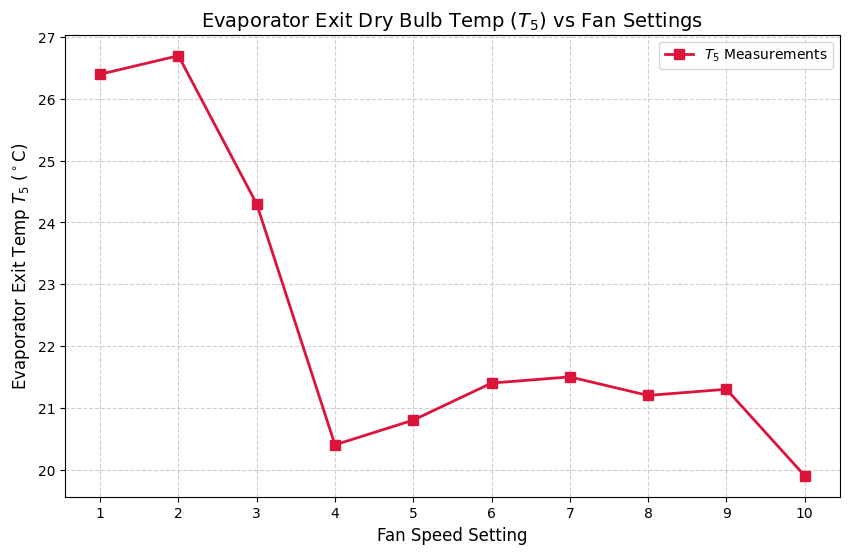

In [3]:
import matplotlib.pyplot as plt

# Experimental data for fan speed vs evaporator exit temperature
fan_settings = [1,2,3,4,5,6,7,8,9,10]
t5_measurements = [26.4, 26.7, 24.3, 20.4, 20.8, 21.4, 21.5, 21.2, 21.3, 19.9]

# Create figure and plot
plt.figure(figsize=(10,6))
plt.plot(fan_settings, t5_measurements, color='crimson', marker='s', markersize=7, linewidth=2, linestyle='-')

# Titles and axis labels with LaTeX formatting
plt.title('Evaporator Exit Dry Bulb Temp ($T_5$) vs Fan Settings', fontsize=14)
plt.xlabel('Fan Speed Setting', fontsize=12)
plt.ylabel('Evaporator Exit Temp $T_5$ ($^\circ$C)', fontsize=12)

# Set x-axis ticks
plt.xticks(fan_settings)

# Add grid and legend
plt.grid(alpha=0.6, linestyle='--')
plt.legend(['$T_5$ Measurements'], loc='upper right')

# Display the plot
plt.show()


## Experimental Analysis and Thermodynamic Framework

This section presents the mathematical approach used to compute the cooling capacity of the laboratory unit using measured experimental data.

---

### Mass Flow Rate of Air ($\dot{m}_a$)
The air mass flow rate is essential for calculating the heat transfer:

$$\dot{m}_a = \rho \cdot A \cdot V_{in}$$

* **$\rho$**: Air density ($\approx 1.2 \text{ kg/m}^3$)  
* **$A$**: Duct cross-sectional area ($m^2$)  
* **$V_{in}$**: Measured intake air velocity ($m/s$)

---

### Calculation of Specific Enthalpy ($h$)
The total energy (sensible + latent) removed from the air is calculated using the measured dry bulb ($T_{db}$) and wet bulb ($T_{wb}$) temperatures.

#### Step 1: Saturation Vapor Pressure ($P_{swb}$)
Using Magnus-Tetens formula at the wet bulb temperature:

$$P_{swb} = 0.61078 \cdot \exp\left(\frac{17.27 \cdot T_{wb}}{T_{wb} + 237.3}\right)$$

#### Step 2: Actual Vapor Pressure ($P_v$)
Accounting for evaporative cooling:

$$P_v = P_{swb} - 0.000662 \cdot P_{atm} \cdot (T_{db} - T_{wb})$$

* **$P_{atm}$**: Atmospheric pressure ($101.325 \text{ kPa}$)

#### Step 3: Humidity Ratio ($\omega$)
$$\omega = 0.62194 \cdot \frac{P_v}{P_{atm} - P_v}$$

#### Step 4: Specific Enthalpy ($h$)
Total enthalpy in $\text{kJ/kg}$:

$$h = c_{pa} \cdot T_{db} + \omega \cdot (h_{fg} + c_{pv} \cdot T_{db})$$

* **$c_{pa}$**: $1.006 \text{ kJ/kg·K}$ (dry air)  
* **$h_{fg}$**: $2501 \text{ kJ/kg}$ (latent heat)  
* **$c_{pv}$**: $1.86 \text{ kJ/kg·K}$ (water vapor)

---

### Determination of Cooling Capacity ($\dot{Q}$)
The experimental heat removal rate is calculated from the enthalpy difference between inlet and exit air:

$$\dot{Q} = \dot{m}_a \cdot (h_{in} - h_{out})$$

* **$h_{in}$**: Enthalpy at return air (inlet)  
* **$h_{out}$**: Enthalpy at evaporator exit (outlet)


<>:45: SyntaxWarning: invalid escape sequence '\d'
<>:45: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3666202224.py:45: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Cooling Capacity ($\dot{Q}$) vs Fan Speed', fontsize=14)


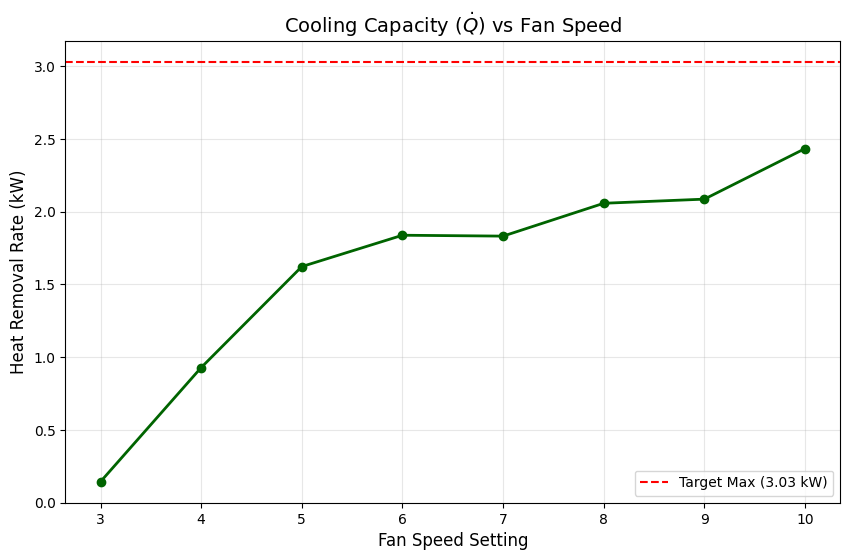

   fan_speed  V_in     Q_dot
0          3   0.6  0.144262
1          4   2.8  0.928436
2          5   5.6  1.622419
3          6   8.8  1.837842
4          7   9.3  1.831778
5          8   9.6  2.057423
6          9   9.8  2.085847
7         10   9.5  2.433180


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Experimental Data
data = {
    "fan_speed": [3, 4, 5, 6, 7, 8, 9, 10],
    "T1_db_in": [29.9, 30.0, 29.2, 29.2, 29.4, 29.0, 28.7, 29.4],  # Return Air DB
    "T2_wb_in": [25.3, 24.9, 23.7, 23.3, 23.2, 23.1, 22.9, 23.2],  # Return Air WB
    "T5_db_out": [24.3, 20.4, 20.8, 21.4, 21.5, 21.2, 21.3, 19.9],  # Exit DB
    "T6_wb_out": [19.7, 16.6, 16.2, 18.0, 18.2, 17.6, 17.4, 16.5],  # Exit WB
    "V_in": [0.6, 2.8, 5.6, 8.8, 9.3, 9.6, 9.8, 9.5]  # Inlet velocity
}

df = pd.DataFrame(data)

# 2. Thermodynamic Constants
P_atm = 101.325  # kPa
rho_air = 1.2    # kg/m³
D_duct = 0.11    # duct diameter in meters
A_duct = np.pi * (D_duct**2) / 4  # duct cross-sectional area

# 3. Function to calculate specific enthalpy (kJ/kg)
def calculate_enthalpy(T_db, T_wb):
    P_swb = 0.61078 * np.exp((17.27 * T_wb) / (T_wb + 237.3))
    P_v = P_swb - 0.000662 * P_atm * (T_db - T_wb)
    w = 0.62194 * P_v / (P_atm - P_v)
    h = 1.006 * T_db + w * (2501 + 1.86 * T_db)
    return h

# 4. Calculate enthalpies
df['h_in'] = df.apply(lambda row: calculate_enthalpy(row['T1_db_in'], row['T2_wb_in']), axis=1)
df['h_out'] = df.apply(lambda row: calculate_enthalpy(row['T5_db_out'], row['T6_wb_out']), axis=1)

# 5. Mass flow rate (kg/s)
df['m_dot'] = rho_air * A_duct * df['V_in']

# 6. Cooling Load (kW)
df['Q_dot'] = df['m_dot'] * (df['h_in'] - df['h_out'])

# 7. Visualization
plt.figure(figsize=(10,6))
plt.plot(df['fan_speed'], df['Q_dot'], marker='o', color='darkgreen', linewidth=2)

plt.title('Cooling Capacity ($\dot{Q}$) vs Fan Speed', fontsize=14)
plt.xlabel('Fan Speed Setting', fontsize=12)
plt.ylabel('Heat Removal Rate (kW)', fontsize=12)
plt.axhline(y=3.03, color='red', linestyle='--', label='Target Max (3.03 kW)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# 8. Display key results
print(df[['fan_speed', 'V_in', 'Q_dot']])


## Preliminary Conclusion and Experimental Transition

Based on the analysis of the evaporator exit temperatures ($T_5, T_6$) and the calculated cooling capacities ($\dot{Q}$) for different fan speed settings, the following observations are made:

---

### Optimization of Fan Speed
* **Peak Performance:** The highest heat removal occurs at the **maximum evaporator fan speed**.  
* **Effective Cooling:** While the air velocity slightly peaked at Speed 9, the lowest exit temperatures ($T_5 = 19.9^\circ\text{C}$ and $T_6 = 16.5^\circ\text{C}$) were observed at **Speed 10**, showing the most efficient cooling.  
* **Mass Flow Impact:** The increase in mass flow rate ($\dot{m}_a$) at higher fan speeds compensates for the shorter air-evaporator contact time, yielding the maximum net cooling rate in kW.  
* **Comparison to Target:** Despite this, the cooling capacity is still below the target values of $2.73$ kW (average case) and $3.03$ kW (maximum case).

---

### Next Step: Closed-Door Cooling Rate Test
After identifying the optimal fan speed, the next experiment will evaluate the unit's capability to cool the actual storage room:

* **Objective:** Measure the actual cooling rate ($\frac{dT}{dt}$) in the storage environment.  
* **Procedure:** Close the room door and operate the unit at the **maximum fan speed**.  
* **Data Recording:** Monitor temperature decay over time to verify whether the room can reach the target storage temperature of $15^\circ\text{C}$ within the 2-hour requirement.


# OBSERVATIONS

## Experiment 02: Closed-Door Cooling Rate Study

This experiment monitors the cooling room’s temperature behavior under closed-door conditions to assess the unit’s actual pull-down performance.

### Experimental Data
The unit was operated at the optimal evaporator fan speed (**Speed 10**) identified in Experiment 01. The air intake velocity remained constant at **$V_{in} = 9.5$ m/s**.

Temperature measurements were recorded at 1-minute intervals for the evaporator inlet ($T_3, T_4$) and exit ($T_5, T_6$):

| Time (min) | $T_3$ (°C) | $T_4$ (°C) | $T_5$ (°C) | $T_6$ (°C) |
|:---:|:---:|:---:|:---:|:---:|
| 1  | 27.4 | 19.9 | 20.3 | 16.4 |
| 2  | 27.0 | 19.6 | 20.2 | 16.4 |
| 3  | 26.7 | 19.3 | 20.0 | 16.2 |
| 4  | 26.4 | 18.9 | 19.8 | 16.1 |
| 5  | 26.1 | 18.7 | 19.7 | 16.0 |
| 6  | 25.9 | 18.5 | 19.5 | 15.8 |
| 7  | 25.7 | 18.3 | 19.3 | 15.6 |
| 8  | 25.5 | 18.2 | 19.2 | 15.5 |
| 9  | 25.4 | 18.0 | 18.9 | 15.4 |
| 10 | 25.2 | 17.9 | 18.8 | 15.3 |
| 11 | 25.1 | 17.7 | 18.7 | 15.2 |
| 12 | 24.9 | 17.6 | 18.6 | 15.0 |
| 13 | 24.8 | 17.5 | 18.4 | 15.0 |
| 14 | 24.6 | 17.4 | 18.4 | 14.9 |
| 15 | 24.5 | 17.3 | 18.2 | 14.8 |

---

### Mathematical Framework for Instantaneous Cooling Rate

**Step 1: Constant Mass Flow Rate ($\dot{m}_a$)**  
Using the optimal velocity $V_{in} = 9.5$ m/s and duct area $A \approx 0.0095$ m²:

$$\dot{m}_a = \rho \cdot A \cdot V_{in}$$

*Where $\rho \approx 1.2$ kg/m³.*

**Step 2: Instantaneous Specific Enthalpy ($h_t$)**  
For each time step, compute the specific enthalpy at the inlet ($T_3, T_4$) and outlet ($T_5, T_6$) using the same psychrometric relations as in previous experiments.

**Step 3: Instantaneous Cooling Rate ($\dot{Q}_t$)**  
The heat removal rate at any moment is calculated as:

$$\dot{Q}_t = \dot{m}_a \cdot (h_{in,t} - h_{out,t})$$

This gives the cooling capacity (kW) at each time step, allowing analysis of the room’s pull-down performance.


# Graphs & Calculations

<>:50: SyntaxWarning: invalid escape sequence '\c'
<>:50: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-1152820195.py:50: SyntaxWarning: invalid escape sequence '\c'
  ax2.set_ylabel('Cooling Rate ($^\circ$C/min)', color='tab:blue', fontsize=12)


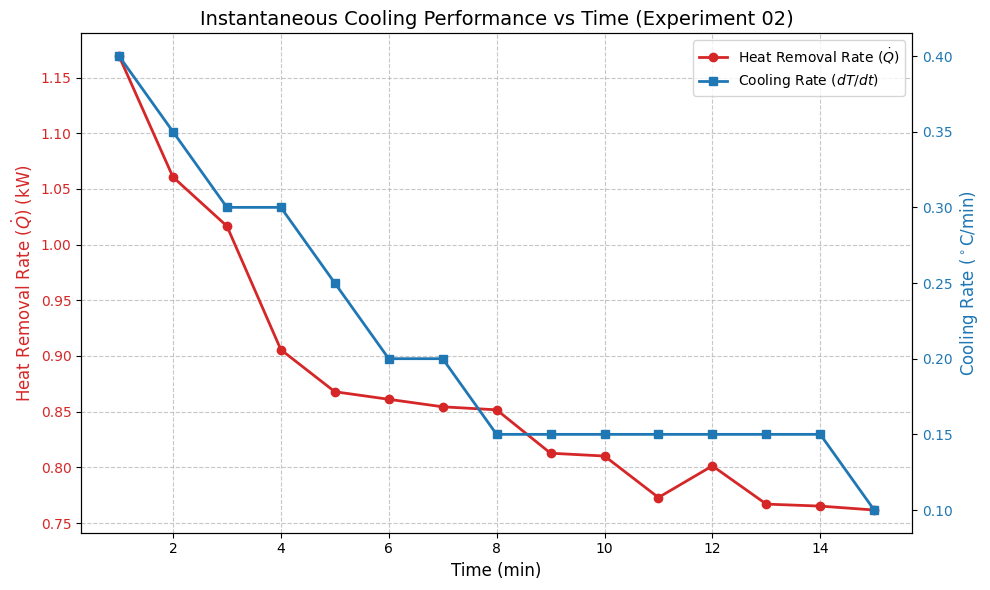

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Experimental Data for Closed-Door Cooling (Experiment 02)
time = np.arange(1, 16)
t3 = np.array([27.4, 27.0, 26.7, 26.4, 26.1, 25.9, 25.7, 25.5, 25.4, 25.2, 25.1, 24.9, 24.8, 24.6, 24.5])
t4 = np.array([19.9, 19.6, 19.3, 18.9, 18.7, 18.5, 18.3, 18.2, 18.0, 17.9, 17.7, 17.6, 17.5, 17.4, 17.3])
t5 = np.array([20.3, 20.2, 20.0, 19.8, 19.7, 19.5, 19.3, 19.2, 18.9, 18.8, 18.7, 18.6, 18.4, 18.4, 18.2])
t6 = np.array([16.4, 16.4, 16.2, 16.1, 16.0, 15.8, 15.6, 15.5, 15.4, 15.3, 15.2, 15.0, 15.0, 14.9, 14.8])

# 2. Thermodynamic Constants
P_atm = 101.325  # kPa
rho_air = 1.2    # kg/m3
d_duct = 0.11    # m
v_in = 9.5       # m/s (optimum fan speed)
A_duct = np.pi * (d_duct**2) / 4
m_dot = rho_air * A_duct * v_in  # Mass flow rate (kg/s)

# 3. Enthalpy Calculation Function
def enthalpy(db, wb):
    p_swb = 0.61078 * np.exp((17.27 * wb) / (wb + 237.3))
    p_v = p_swb - 0.000662 * P_atm * (db - wb)
    w = 0.62194 * p_v / (P_atm - p_v)
    h = 1.006 * db + w * (2501 + 1.86 * db)  # kJ/kg
    return h

# 4. Compute Inlet and Outlet Enthalpies
h_in = np.array([enthalpy(db, wb) for db, wb in zip(t3, t4)])
h_out = np.array([enthalpy(db, wb) for db, wb in zip(t5, t6)])

# 5. Instantaneous Cooling Rate (kW)
q_dot = m_dot * (h_in - h_out)

# 6. Temperature Decay Rate (degC/min)
dT_dt = -np.gradient(t3, time)

# 7. Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Heat Removal Rate
ax1.plot(time, q_dot, marker='o', color='tab:red', linewidth=2, label='Heat Removal Rate ($\\dot{Q}$)')
ax1.set_xlabel('Time (min)', fontsize=12)
ax1.set_ylabel('Heat Removal Rate ($\\dot{Q}$) (kW)', color='tab:red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.grid(True, linestyle='--', alpha=0.7)

# Cooling Rate on Secondary Axis
ax2 = ax1.twinx()
ax2.plot(time, dT_dt, marker='s', color='tab:blue', linewidth=2, label='Cooling Rate ($dT/dt$)')
ax2.set_ylabel('Cooling Rate ($^\circ$C/min)', color='tab:blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Legend and Title
lines = [ax1.lines[0], ax2.lines[0]]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right')
plt.title('Instantaneous Cooling Performance vs Time (Experiment 02)', fontsize=14)

plt.tight_layout()
plt.savefig('experiment02_cooling_plot.png')
plt.show()


In [6]:
# 5. Summary Statistics for Experiment 02
peak_q_dot = np.max(q_dot)
mean_q_dot = np.mean(q_dot)

print("--- Experiment 02 Summary Results ---")
print(f"Peak Heat Removal Rate: {peak_q_dot:.4f} kW")
print(f"Average Heat Removal Rate: {mean_q_dot:.4f} kW")


--- Experiment 02 Summary Results ---
Peak Heat Removal Rate: 1.1693 kW
Average Heat Removal Rate: 0.8719 kW


# DISCUSSION

### Errors and Justifications
* **Air Flow Rate Consideration:** Only the return air inlet velocity was used to calculate the mass flow rate. This is because the measured velocity at the cooled air outlet is significantly lower due to losses when the air exits the duct into the room. Measuring at the outlet results in a lower apparent velocity compared to the true flow inside the duct.  
* **Measurement Location Impact:** The flow meter at the duct opening reads less than the actual velocity inside the duct because the air accelerates inside the duct and decelerates when entering the still room air. Using an averaged inlet and outlet velocity would reduce the accuracy of the calculated cooling performance.  
* **Psychrometric Evaluation Method:** Calculating enthalpy and humidity ratio using mathematical equations in Python (Colab) is more precise and convenient than relying on traditional psychrometric charts. This ensures accurate determination of the thermodynamic state of air at both inlet and outlet.


# DISCUSSION

### Errors and Justifications
* **Air Flow Rate Consideration:** Only the return air inlet velocity was used for calculating the mass flow rate. The cooled air outlet shows a lower measured velocity due to losses when air exits the duct into the room. Using the outlet reading would underestimate the actual flow inside the duct.  
* **Measurement Location Impact:** Flow meters at the duct openings record lower velocities than inside the duct because air accelerates within the duct and decelerates when released into the still room. Averaging inlet and outlet velocities could reduce accuracy in the calculated cooling performance.  
* **Psychrometric Evaluation Method:** Determining enthalpy and humidity ratio with Python (Colab) is more accurate and convenient than using traditional psychrometric charts, allowing precise evaluation of the thermodynamic state at both inlet and outlet.

### Further Verification of Cooling Capacity
Although the instantaneous heat removal rates from Experiment 02 were below the theoretical requirement of 3.03 kW, the experiment was conducted at room temperatures of 24.5°C to 27.4°C. In practice, the system must cool milk starting from higher temperatures (37.5°C to 40.0°C).  

By smoothing the experimental data, a linear regression can represent the cooling capacity as a function of inlet temperature ($T_3$):

$$\dot{Q}(T_3) = 0.1286 \cdot T_3 - 2.4305$$

where $\dot{Q}$ is in kW and $T_3$ is in °C. Using this equation and the calibrated thermal mass of the laboratory setup ($C_{exp} \approx 269.28$ kJ/K), a 120-minute simulation was performed starting from design temperatures.

* Predicted mean $\dot{Q}$ at 35.0°C: **0.840 kW**  
* Predicted mean $\dot{Q}$ at 37.5°C: **1.041 kW**  
* Predicted mean $\dot{Q}$ at 40.0°C: **1.242 kW**  

The extrapolation shows that the instantaneous cooling rate initially rises with higher starting temperatures, reaching about **2.71 kW** at 40.0°C. However, due to the relatively low thermal mass of the room, the average heat removal over the full period remains below the required 3.03 kW.  

**Conclusion:** While the unit responds mechanically to higher temperatures, the current capacity is insufficient to cool 40 containers of milk to 15°C


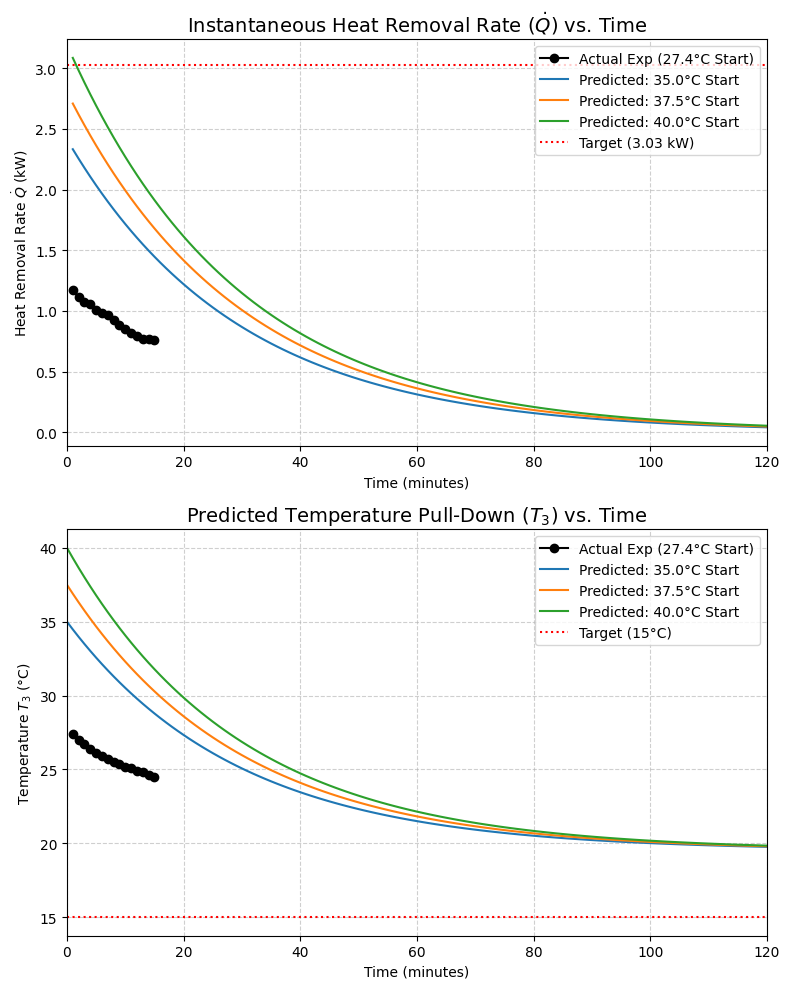

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Original Experimental Data (Experiment 02)
time_obs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
t3_obs = np.array([27.4, 27.0, 26.7, 26.4, 26.1, 25.9, 25.7, 25.5, 25.4, 25.2, 25.1, 24.9, 24.8, 24.6, 24.5])
q_dot_obs = np.array([1.169, 1.111, 1.077, 1.054, 1.011, 0.985, 0.963, 0.925, 0.884, 0.852, 0.821, 0.795, 0.771, 0.765, 0.762])

# 2. Derive Calibrated Thermal Mass (C_exp)
avg_q = np.mean(q_dot_obs)
temp_drop_rate = (t3_obs[0] - t3_obs[-1]) / (time_obs[-1] - time_obs[0])  # degC/min
C_exp = (avg_q * 60) / temp_drop_rate  # kJ/K, scaling to per-minute rate

# 3. Linear Model for Heat Removal Rate as a function of T3
model = LinearRegression().fit(t3_obs.reshape(-1, 1), q_dot_obs)
m, c = model.coef_[0], model.intercept_

# 4. Simulation Function (Predict Q_dot and T over 120 minutes)
def simulate_full(T_start, duration=120):
    Q_history = []
    T_history = [T_start]
    T_curr = T_start
    for _ in range(duration):
        Q_inst = m * T_curr + c
        Q_history.append(Q_inst)
        T_curr -= (Q_inst * 60) / C_exp  # Convert kW to degC per min using C_exp
        T_history.append(T_curr)
    return T_history, Q_history

# 5. Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# --- Subplot 1: Heat Removal Rate
ax1.plot(time_obs, q_dot_obs, 'ko-', label='Actual Exp (27.4°C Start)')
sim_time_q = np.arange(1, 121)
for start in [35.0, 37.5, 40.0]:
    _, q_hist = simulate_full(start, duration=120)
    ax1.plot(sim_time_q, q_hist, label=f'Predicted: {start}°C Start')

ax1.axhline(y=3.03, color='red', linestyle=':', label='Target (3.03 kW)')
ax1.set_title(r'Instantaneous Heat Removal Rate ($\dot{Q}$) vs. Time', fontsize=14)
ax1.set_xlabel('Time (minutes)')
ax1.set_ylabel(r'Heat Removal Rate $\dot{Q}$ (kW)')
ax1.set_xlim(0, 120)
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.6)

# --- Subplot 2: Temperature Pull-Down
ax2.plot(time_obs, t3_obs, 'ko-', label='Actual Exp (27.4°C Start)')
sim_time_t = np.arange(0, 121)
for start in [35.0, 37.5, 40.0]:
    t_hist, _ = simulate_full(start, duration=120)
    ax2.plot(sim_time_t, t_hist, label=f'Predicted: {start}°C Start')

ax2.axhline(y=15, color='red', linestyle=':', label='Target (15°C)')
ax2.set_title(r'Predicted Temperature Pull-Down ($T_3$) vs. Time', fontsize=14)
ax2.set_xlabel('Time (minutes)')
ax2.set_ylabel(r'Temperature $T_3$ (°C)')
ax2.set_xlim(0, 120)
ax2.legend(loc='upper right')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Therefore, it can be confidently concluded that the laboratory air conditioning unit **cannot achieve the target cooling of the storage within the specified 2-hour window** under any realistic operating conditions. This is supported by both the experimental results (Experiment 02) and the calibrated simulation for higher starting temperatures, which consistently show that the mean heat removal rate remains below the required 3.03 kW for the full duration.


Therefore, it can be confidently concluded that the laboratory air conditioning unit **is incapable of achieving the required cooling of the storage to 15°C within the 2-hour period** under any practical operating conditions. This conclusion is supported by the experimental observations from Experiment 02 and the calibrated simulation results at elevated starting temperatures, both of which indicate that the mean heat removal rate consistently falls short of the required 3.03 kW.
